# <center>EDA

In [1]:
import os
os.chdir("..")

In [2]:
import numpy as np
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

## data

In [3]:
data_path = "data"

In [4]:
X_train = np.load(os.path.join(data_path, "X_train.npy"))
X_test = np.load(os.path.join(data_path, "X_test.npy"))
y_train = np.load(os.path.join(data_path, "y_train.npy"))
y_test = np.load(os.path.join(data_path, "y_test.npy"))

In [5]:
X_train.shape, y_train.shape

((7352, 128, 9), (7352, 6))

In [6]:
X_test.shape, y_test.shape

((2947, 128, 9), (2947, 6))

In [7]:
# X_train

In [8]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

## <center>Часть 1.

### Чтобы "пощупать" данные, спрямим 1-ю и 2-ю ось, посчитаем некоторые статистики, проверим на пропуски, сделаем некоторые визуализации и т.п.

#### Спрямим 1 и 2 ось и для удобства переведем в DataFrame

In [9]:
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))

In [10]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.804024,0.027620,0.090438,-0.003374,-0.000437,0.004856,-0.000707,0.009055,0.003162,0.804490,...,0.002908,0.806415,0.026274,0.087522,0.001978,-0.002557,0.001282,-0.003504,0.001459,0.003617
std,0.414103,0.390980,0.356996,0.198317,0.125660,0.111204,0.418437,0.374442,0.258786,0.413731,...,0.258495,0.417875,0.392548,0.358952,0.199408,0.121517,0.105263,0.411174,0.372364,0.257599
min,-0.405665,-1.131754,-1.206339,-0.857863,-0.890609,-0.797215,-2.945864,-2.853085,-2.216418,-0.399891,...,-2.036767,-0.411995,-1.297008,-1.147546,-0.795426,-0.994173,-0.719086,-3.658334,-2.651202,-2.192251
25%,0.665270,-0.222442,-0.126715,-0.038449,-0.012259,-0.014686,-0.052254,-0.054155,-0.031872,0.670202,...,-0.019726,0.657181,-0.227482,-0.131867,-0.023289,-0.009988,-0.013037,-0.043289,-0.046645,-0.020614
50%,0.953989,-0.083841,0.047347,-0.000718,0.000669,0.000566,0.000207,0.000530,0.000400,0.955487,...,0.000334,0.956491,-0.085488,0.041329,-0.000622,0.000503,0.000274,-0.000372,-0.000223,0.000506
75%,1.019297,0.182420,0.244732,0.008661,0.026403,0.025860,0.073247,0.056535,0.063529,1.019451,...,0.040743,1.019425,0.188911,0.241278,0.006828,0.016794,0.016118,0.040510,0.032087,0.042660
max,2.104388,1.134527,1.158310,1.133144,0.742966,0.722546,2.570758,3.528782,1.671485,2.074192,...,1.607418,2.060867,1.024147,0.986860,1.087837,0.751092,0.777403,4.077152,3.610321,1.898607


In [11]:
X_train_df.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,1152.0,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,7352.0,0.102066,0.292351,-1.540905,0.014738,0.101553,0.181919,1.619788
std,0.0,0.250061,0.117544,0.983183,0.238859,0.303665,0.306093,0.991116
min,7352.0,-0.016106,0.099763,-5.974330,-0.227482,-0.089313,0.005891,0.494872
25%,7352.0,-0.001453,0.193314,-2.239129,-0.061442,-0.000576,0.020980,0.988772
50%,7352.0,0.002013,0.357857,-1.182674,-0.030098,0.000278,0.046036,1.107598
75%,7352.0,0.030110,0.391949,-0.851829,-0.014427,0.000831,0.192414,2.085775
max,7352.0,0.808747,0.426620,-0.368787,0.679474,0.960227,1.019795,5.746062


In [12]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 1152 entries, 0 to 1151
dtypes: float64(1152)
memory usage: 64.6 MB


#### анализ на пропуски в данных

In [13]:
X_train_df.isna().sum().sum()

0

#### проверим (на всякий случай) на дубликаты

In [14]:
X_train_df.drop_duplicates().shape

(7352, 1152)

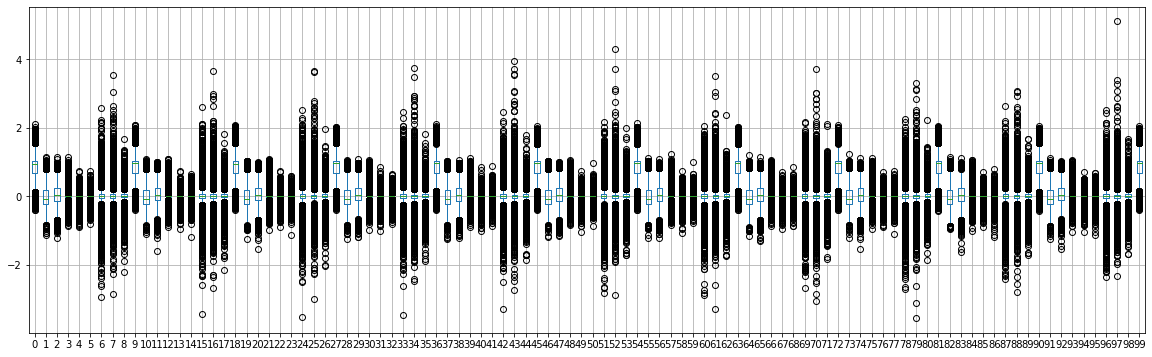

In [15]:
X_train_df.iloc[:, :100].boxplot(figsize=(20, 6));

## Промежуточный вывод по предварительному анализу в Части 1:
- данные кажутся вылидными
- если просто рассматривать сформированные таким образом фичи, то это остроконечные колокола с тяжелыми хвостами-выбросами
- пропусков в данных нет
- дубликатов нет
- видна периодичность характеристик в таким образом сформированных фичах с периодом 9, что соответствует числу сенсоров

## <center>Описательная статистика
### Комментарий: понятно, что в таком виде фичи вряд ли будут использоваться, но для полноты картины сделаем **описательную статистику**, тем более для этого есть очень удобные инструменты

Раздел описательной статистики включает в себя проверку на нормальность распределения и определение прочих статистических метрик. С этим нам поможет замечательная библиотека **pandas-profiling**

### Для анализа возьмем первые 18 таким образом сформированных фич
#### ПРИМЕЧАНИЕ: версию с этим разделом см. в **01_EDA.ipynb**

In [1]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(X_train_df.iloc[:, :18])
# profile

## <center>Часть 2.
### Проанализируем данные, учитывая, что фичи каждого семпла представляют собой по 9 временных рядов

#### Переформатируем, для удобства, формат таргетов из one-hot представления в числовые значения

In [17]:
y_train_num = y_train.argmax(1)
y_train_num[:100]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Каждый семпл - серия из 9 временных рядов. Сделаем несколько визуализаций исходныых данных и некоторых преобразований исходных данных, чтобы посмотреть, насколько классы отделимы друг от друга и как лучше выполнить Feature Engineering

#### функция для визуализации

In [52]:
def plot_random_data(data, y, ncols=7):
    """
    Function for visualization of random sequences
    """
    data_len = len(data)
    idxs = {label: np.arange(data_len)[y == label] for label in np.unique(y)}

    nrows = len(np.unique(y))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
    for row in range(nrows):
        label_idxs = np.random.choice(idxs[row], size=ncols)
        for col in range(ncols):
            ax = axes[row, col]
            num = label_idxs[col]
            df = pd.DataFrame(data[num])
            df.plot(title=f"y = {y_train_num[num]}, num = {num}", ax=ax, legend=None)
    plt.tight_layout()

### Визуализация исходных рядов

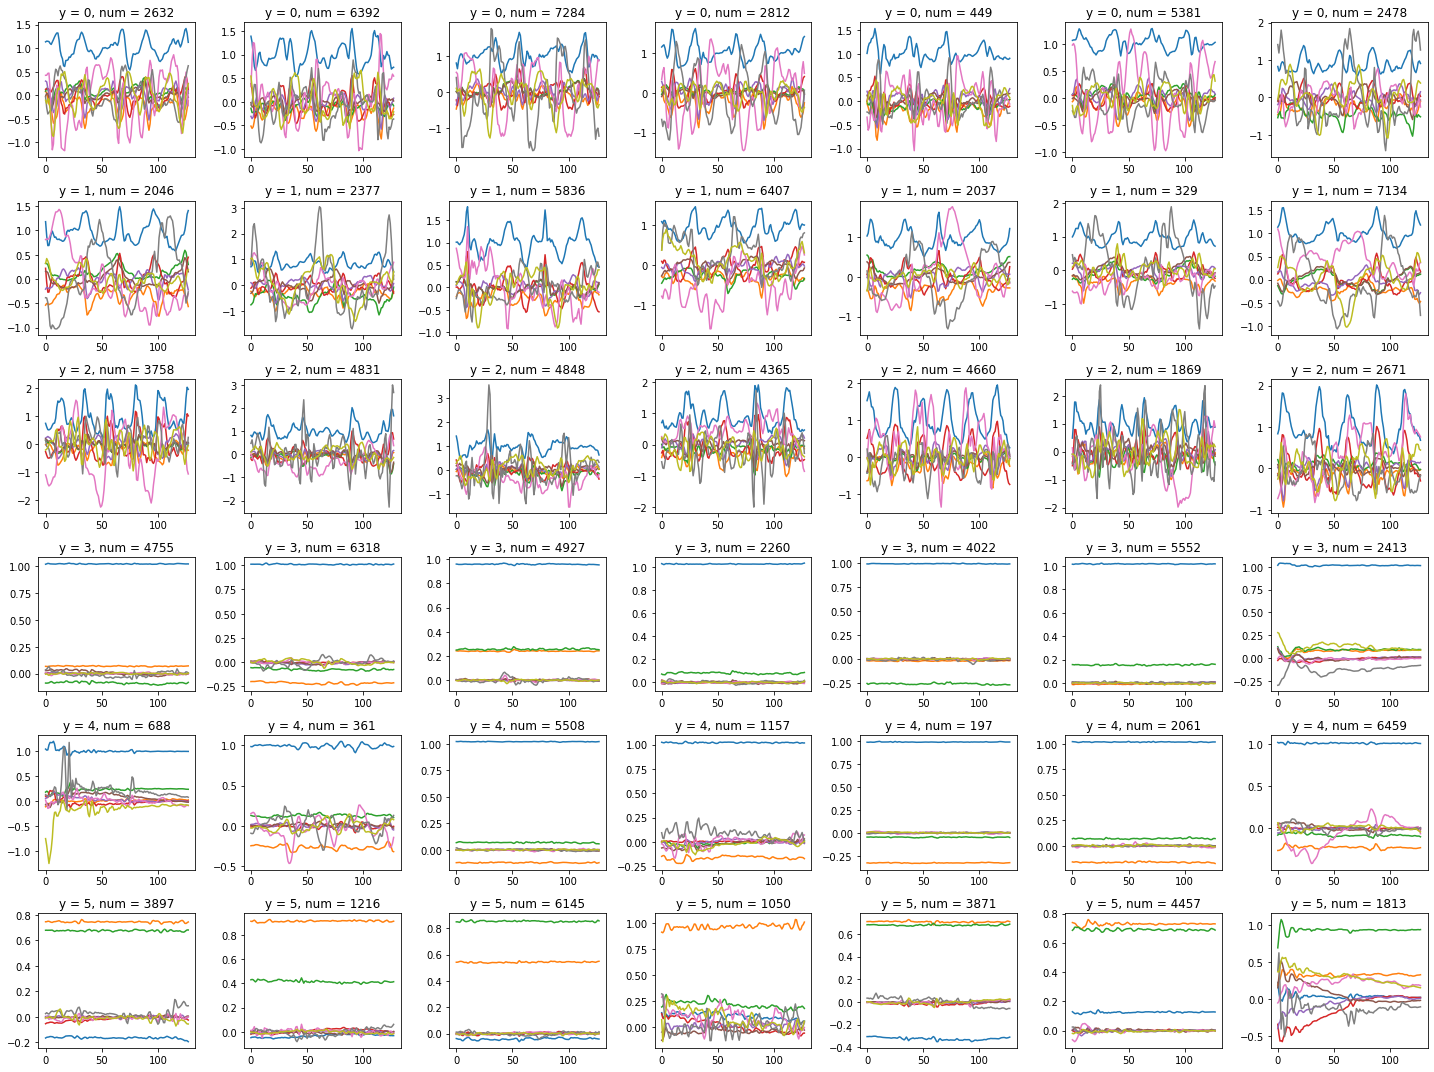

In [53]:
plot_random_data(X_train, y_train_num)

### Комментарий по визуализации:
- исходя из визуализации, видно, что некоторые классы хорошо отделимы от других, некоторые классы не так очевидно отделимы. Но, думаю, грамотным подбором фич и характеристик рядов можно сформировать фичи, которые позволят классифицировать данные с достаточно высоким качеством

### Визуализация первой производной рядов

In [54]:
diff = X_train[:, 1:, :] - X_train[:, :-1, :]

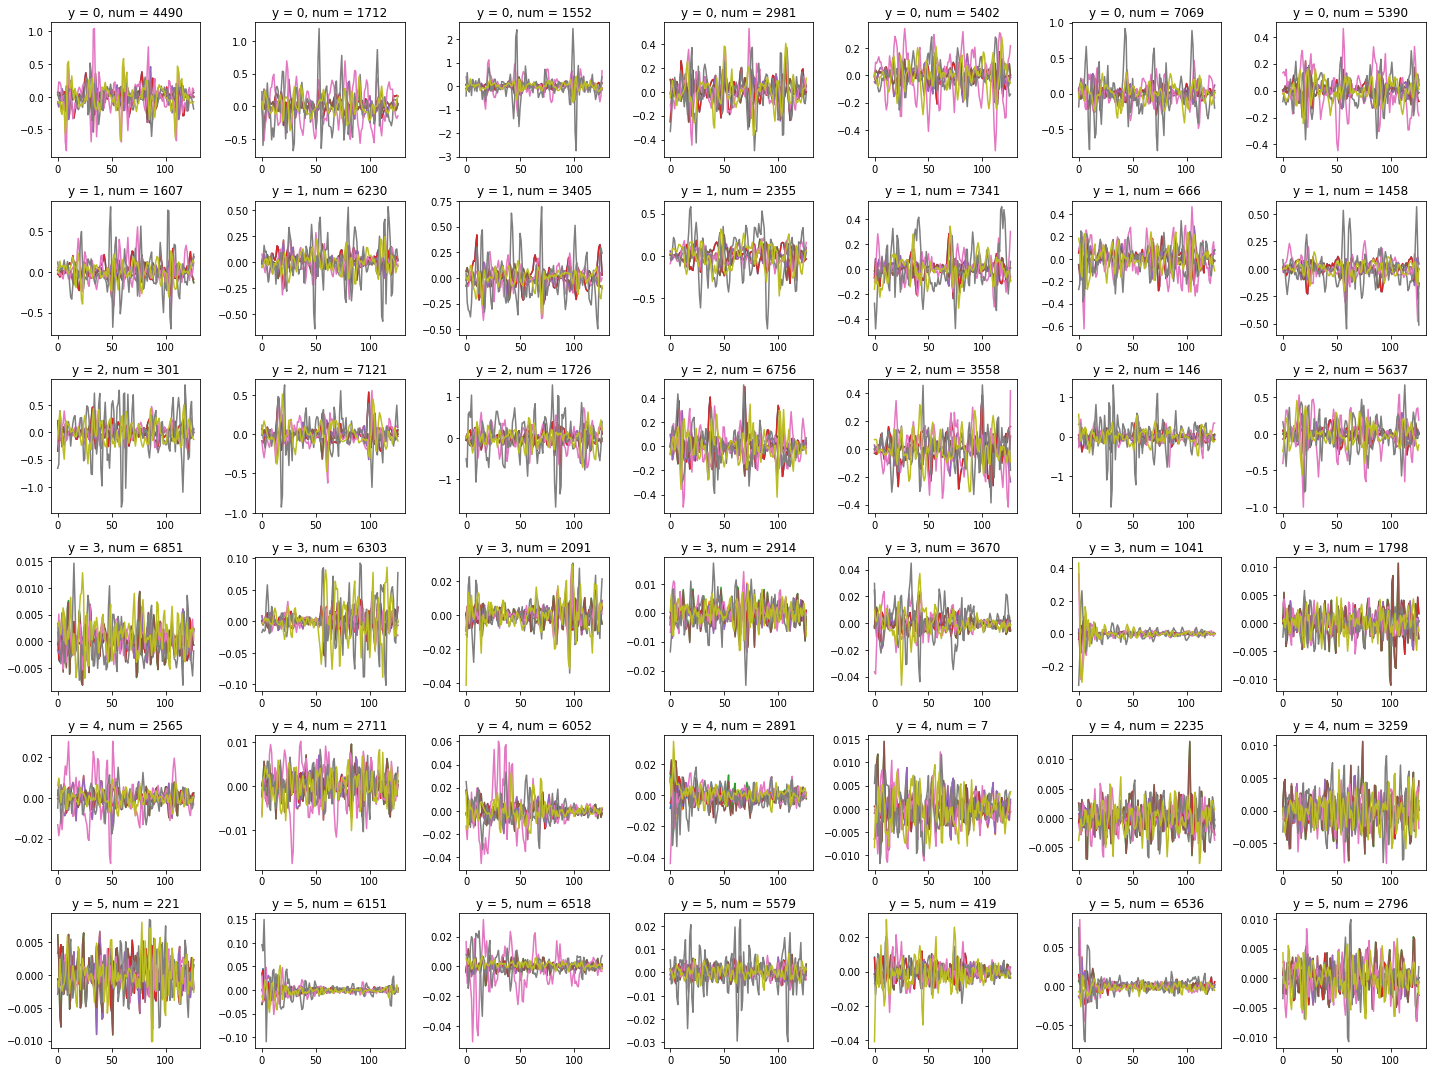

In [55]:
plot_random_data(diff, y_train_num)

#### Вывод: средние везде близки к нулю, а вот по дисперсии ряды отличаются, это можно взять за фичу

### Визуализация коэффициентов фурье, полученных быстрым дискретным фурье-преобразованиеем

Возьмем только реальную часть и только первые 20 (не считая нулевого) коэффициентов

In [78]:
fft = np.fft.fft(X_train, axis=1)[:, 1:20, :]

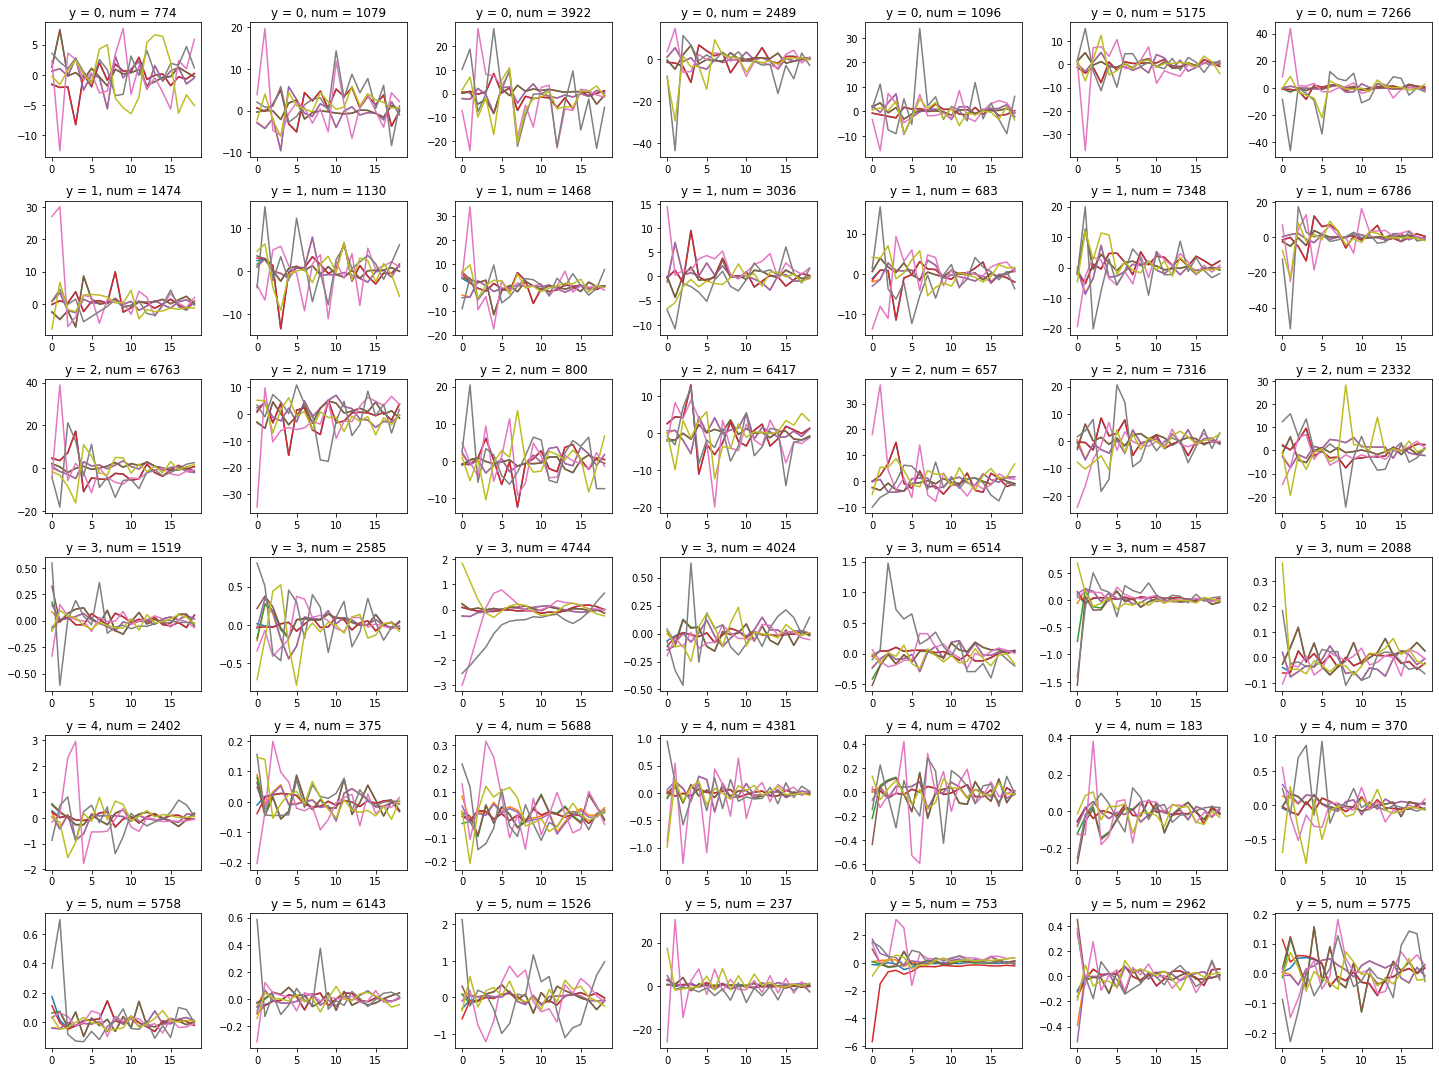

In [79]:
plot_random_data(fft.real, y_train_num)

#### Вывод: наверное, среднее и дисперсию можно взять за фичи

### Комментарий по методикам классификации:
Исходя из характера данных и поставленной задачи напрашиваются следующие варианты методик классификации
- формирование фич из характеристик временных рядов и последующее применение одного из алгоритмов классического ML, например - градиентный бустинг
- применение DL с использованием архитектуры RNN, например, LSTM
- применение DL с использованием архитектуры 1D CNN